<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## this is the data of the exam 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
%matplotlib inline
import ydata_profiling
from sklearn.tree import export_graphviz
from collections import defaultdict
from sklearn.tree import DecisionTreeRegressor
import graphviz
import ydata_profiling

import collections
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from mpl_toolkits.mplot3d import Axes3D


In [44]:
data = pd.read_csv(r'C:\Users\SunInternet.ir\Desktop\data\Copy of Coffee Shop Sales.csv',encoding="utf-8")

In [46]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [45]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [5]:
data['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(data['store_location'])
encoded_type = label_encoder.transform(data['store_location'])
encoded_type[:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2])

In [7]:
encoded_dataset = data.copy()
encoded_dataset['store_location'] = encoded_type
encoded_dataset= encoded_dataset.drop('store_id', axis = 1)
encoded_dataset['store_location'][:100]

0     2
1     2
2     2
3     2
4     2
     ..
95    1
96    2
97    2
98    1
99    2
Name: store_location, Length: 100, dtype: int32

In [8]:
data['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [9]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [10]:
data.shape

(149116, 11)

In [11]:
a = data['transaction_date'].unique()

In [12]:
for i in a:
    print(i[0])

0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3


In [13]:
data['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [14]:
data['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [15]:
data['product_type'].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [16]:
data['product_detail'].unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

In [17]:
data['transaction_qty'].unique()

array([2, 1, 3, 4, 8, 6], dtype=int64)

In [18]:
data.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,30/06/2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [20]:
data.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [21]:
numeric_df = data.select_dtypes(include=['number'])

In [22]:
numeric_df

,transaction_id,transaction_qty,store_id,product_id,unit_price
0,1,2,5,32,3.00
1,2,2,5,57,3.10
2,3,2,5,59,4.50
3,4,1,5,22,2.00
4,5,2,5,57,3.10
...,...,...,...,...,...
149111,149452,2,8,44,2.50
149112,149453,2,8,49,3.00
149113,149454,1,8,45,3.00
149114,149455,1,8,40,3.75


In [23]:
numeric_df.isna().any()

transaction_id     False
transaction_qty    False
store_id           False
product_id         False
unit_price         False
dtype: bool

## whiten dataset

In [24]:

df_standardized = (numeric_df - numeric_df.mean()) / numeric_df.std()

pca = PCA(whiten=True)
df_whitened = pca.fit_transform(df_standardized)

In [25]:
df_whitened

array([[ 1.15554946, -0.32460451,  1.31376827, -1.22004279,  0.05112877],
       [ 0.1961599 , -0.62509366,  1.2261461 , -1.24782334,  1.08292027],
       [ 0.19276092, -0.2395297 ,  1.23024567, -1.20600547,  1.49868411],
       ...,
       [-0.44986505,  0.20220885, -0.5027636 ,  2.06033648, -0.90847867],
       [-0.21741105,  0.48888252, -0.47910584,  2.09026463, -0.93051288],
       [-0.22701183, -1.5694046 , -0.44687856,  2.05061604,  0.61536443]])

## Normal dataset

In [26]:
standard_scaler = StandardScaler()

df_normalized_array  = standard_scaler.fit_transform(df_whitened)


## this is the summarize the data 

In [27]:
df=numeric_df  
data = df.copy()
array_data = np.array(data)
ydata_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## CORR

In [28]:
coor_matrix = numeric_df.corr()

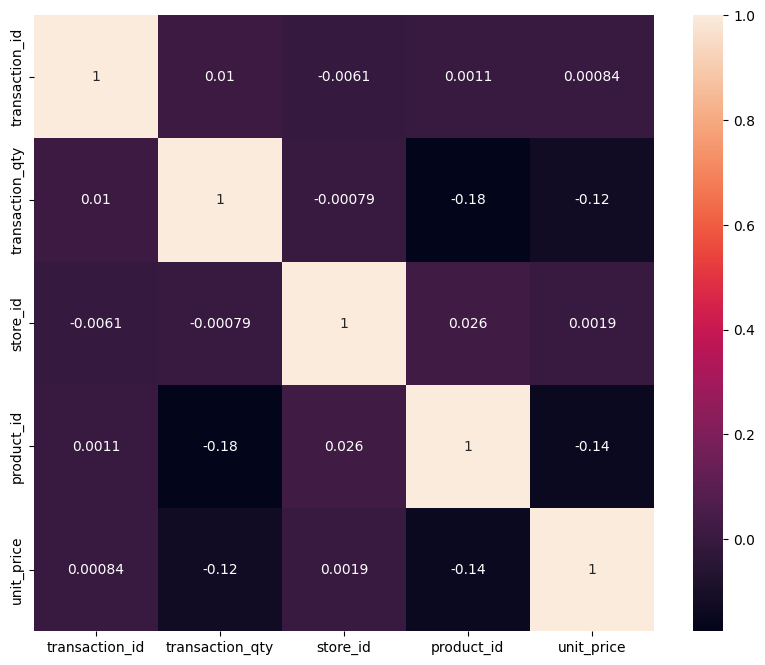

In [29]:
numeric_df = numeric_df
corr_matrix = numeric_df.corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [30]:
coor_matrix.min()

transaction_id    -0.006054
transaction_qty   -0.175255
store_id          -0.006054
product_id        -0.175255
unit_price        -0.140423
dtype: float64

In [31]:
cordata=numeric_df.corr()
cordata=cordata[cordata!=1]
cordata.max()

transaction_id     0.010250
transaction_qty    0.010250
store_id           0.025727
product_id         0.025727
unit_price         0.001891
dtype: float64

## this is the sort_values of the data  

In [32]:
b=data.sort_values(by=["transaction_qty"],ascending=[False])
b

,transaction_id,transaction_qty,store_id,product_id,unit_price
68981,69151,8,8,8,45.0
133337,133674,8,8,8,45.0
9365,9395,8,8,8,45.0
133186,133523,8,8,8,45.0
133407,133744,8,8,8,45.0
...,...,...,...,...,...
82494,82668,1,8,47,3.0
28116,28173,1,3,47,3.0
28117,28174,1,5,48,2.5
82490,82664,1,8,54,2.5


## ploting something 

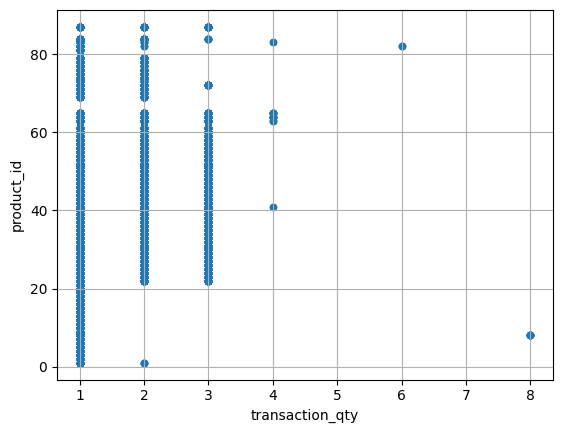

In [33]:
df.plot(kind="scatter", x="transaction_qty", y="product_id", grid=True)
plt.show()

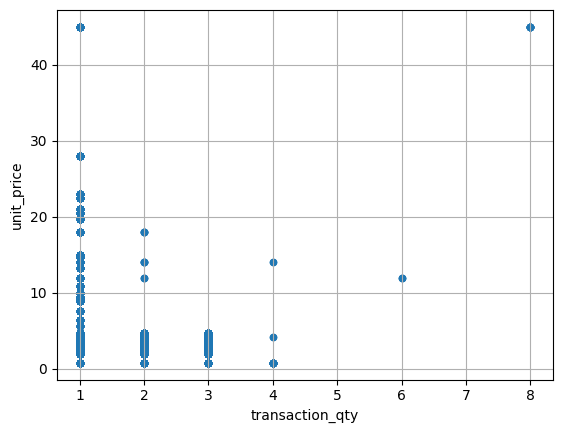

In [34]:
df.plot(kind="scatter", x="transaction_qty", y="unit_price", grid=True)
plt.show()

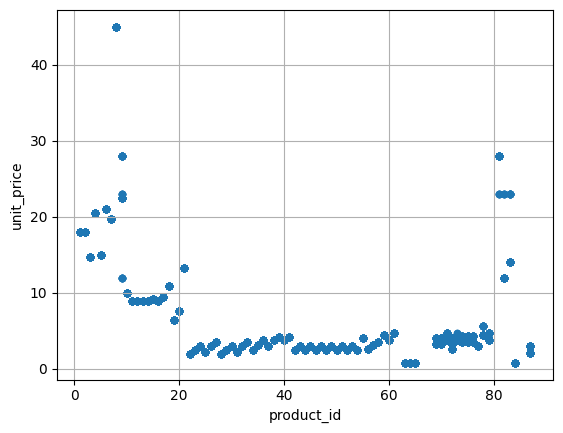

In [35]:
df.plot(kind="scatter", x="product_id", y="unit_price", grid=True)
plt.show()

## this is the histogram of the data 

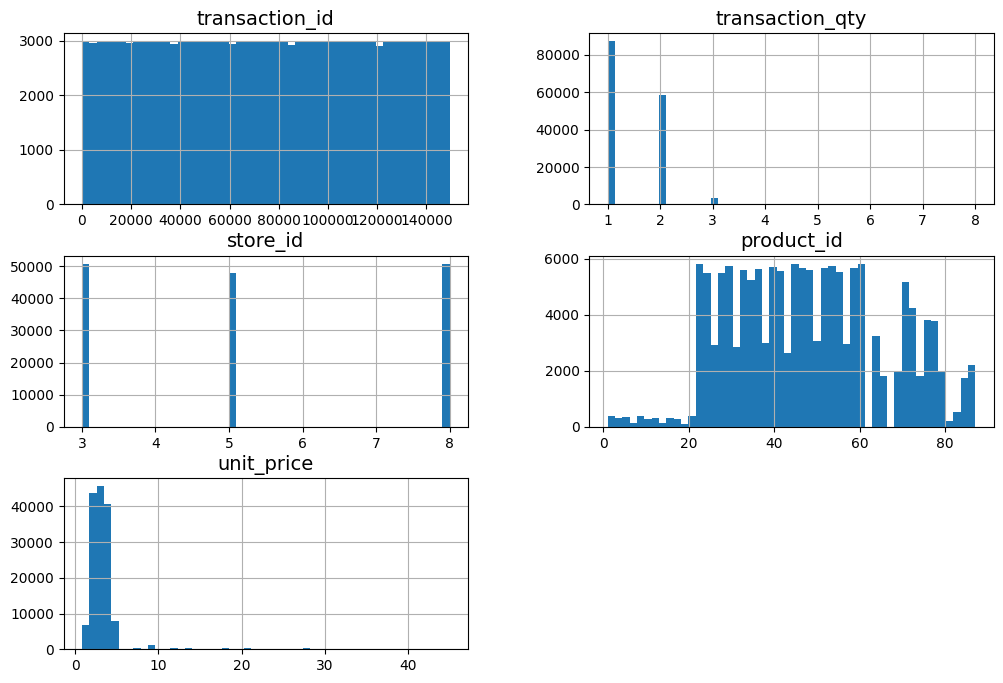

In [36]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

# train test plot of the data

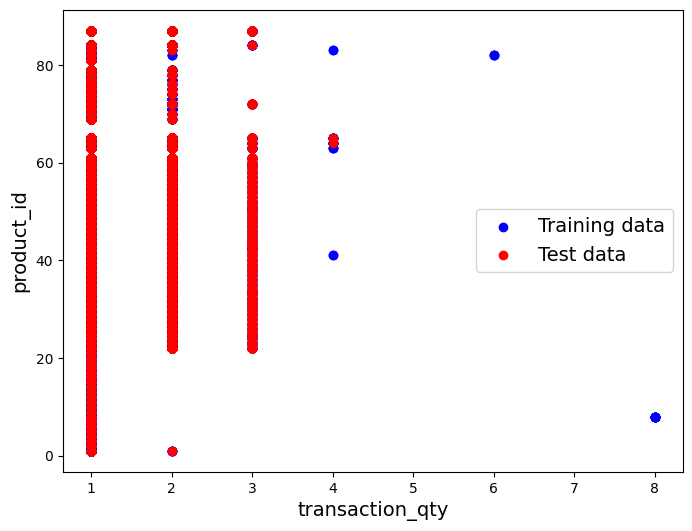

In [37]:

X = df['transaction_qty'].values.reshape(-1, 1)
y = df['product_id'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('transaction_qty')
plt.ylabel('product_id')
plt.legend()
plt.show()

## Coefficuent, accuracy

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
actual = data['transaction_qty']
predicted = data['store_id']
confusion_matrix = metrics.confusion_matrix(actual, predicted)
print(f'This is the Coefficuent  {confusion_matrix}' )
#Accuracy
Accuracy = metrics.accuracy_score(actual, predicted)
print(f'This is Accuracy{Accuracy}')

This is the Coefficuent  [[    0     0 30207     0 27159     0 29793]
 [    0     0 20392     0 17318     0 20932]
 [    0     0     0     0  3279     0     0]
 [    0     0     0     0    23     0     0]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     3     0     0]
 [    0     0     0     0     0     0    10]]
This is Accuracy6.706188470720782e-05


## DecisionTreeClassifier

In [39]:
data['store_location']

KeyError: 'store_location'

In [ ]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,1
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,1


c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Accuracy: 0.587848712446352
Confusion Matrix:
[[17532     0     0     0]
 [11626     0     0     0]
 [  664     0     0     0]
 [    2     0     0     0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.59      1.00      0.74     17532
           2       0.00      0.00      0.00     11626
           3       0.00      0.00      0.00       664
           4       0.00      0.00      0.00         2

    accuracy                           0.59     29824
   macro avg       0.15      0.25      0.19     29824
weighted avg       0.35      0.59      0.44     29824



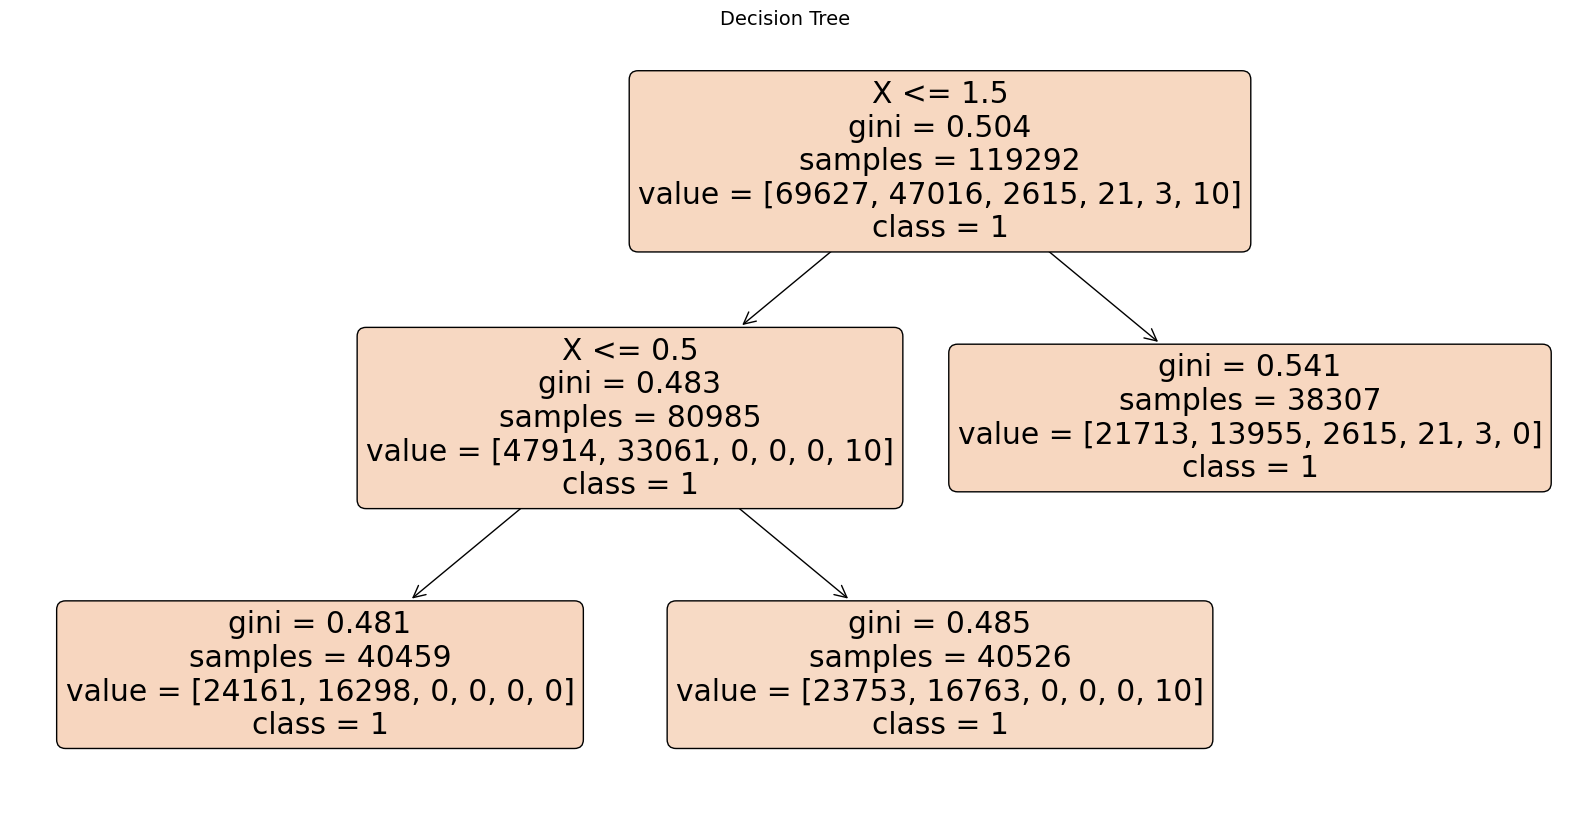

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
label_encoder = LabelEncoder()
encoded_type = label_encoder.fit_transform(data['store_location'])
encoded_dataset1 = data.copy()
encoded_dataset1['store_location'] = encoded_type
encoded_dataset= encoded_dataset1.drop('store_id', axis = 1)

X11 = encoded_dataset1['store_location'].values.reshape(-1,1)
Y11 = data['transaction_qty'].values
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X11, Y11, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

# X = encoded_dataset1['store_location'].values.reshape(-1,1)
# y = data['transaction_qty'].values

model.fit(X_train11, Y_train11)

y_pred1 = model.predict(X_test11)


accuracy = accuracy_score(Y_test11, y_pred1)
conf_matrix = confusion_matrix(Y_test11, y_pred1)
class_report = classification_report(Y_test11, y_pred1)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


class_names = [str(cls) for cls in np.unique(Y_train11)]


plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=['X'], class_names=class_names, rounded=True)
plt.title('Decision Tree')
plt.show()

In [ ]:
data['store_id'][:5].sort_values

<bound method Series.sort_values of 0    5
1    5
2    5
3    5
4    5
Name: store_id, dtype: int64>

## this is the data of the KNN 


In [ ]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [ ]:
data['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(data['product_category'])
encoded_type = label_encoder.transform(data['product_category'])
encoded_type
encoded_dataset = data.copy()
encoded_dataset['product_category'] = encoded_type
encoded_dataset= encoded_dataset.drop('product_type', axis = 1)
encoded_dataset


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,2,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,8,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,4,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,2,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,8,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,8,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,8,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,8,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,2,Cappuccino


In [ ]:
encoded_dataset

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,2,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,8,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,4,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,2,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,8,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,8,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,8,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,8,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,2,Cappuccino


In [ ]:
encoded_dataset['product_category']

0         2
1         8
2         4
3         2
4         8
         ..
149111    8
149112    8
149113    8
149114    2
149115    5
Name: product_category, Length: 149116, dtype: int32

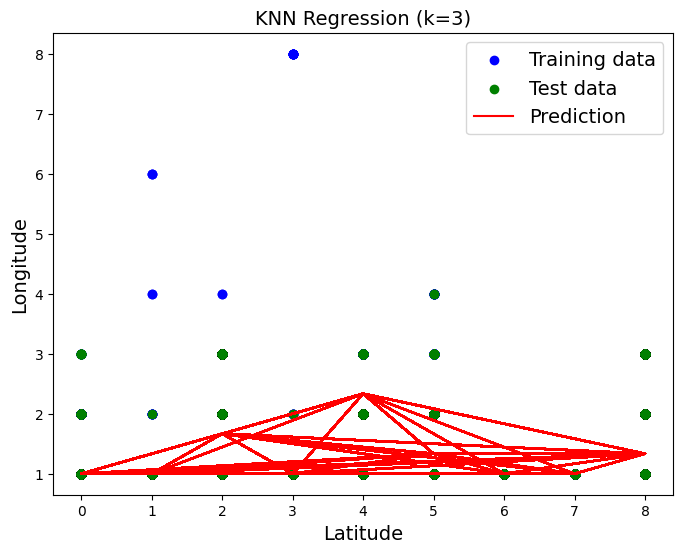

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
encoded_dataset['product_category']
X = encoded_dataset['product_category'].values.reshape(-1,1)
y = data['transaction_qty'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3
knn = KNeighborsRegressor(n_neighbors=k)


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'KNN Regression (k={k})')
plt.legend()
plt.show()

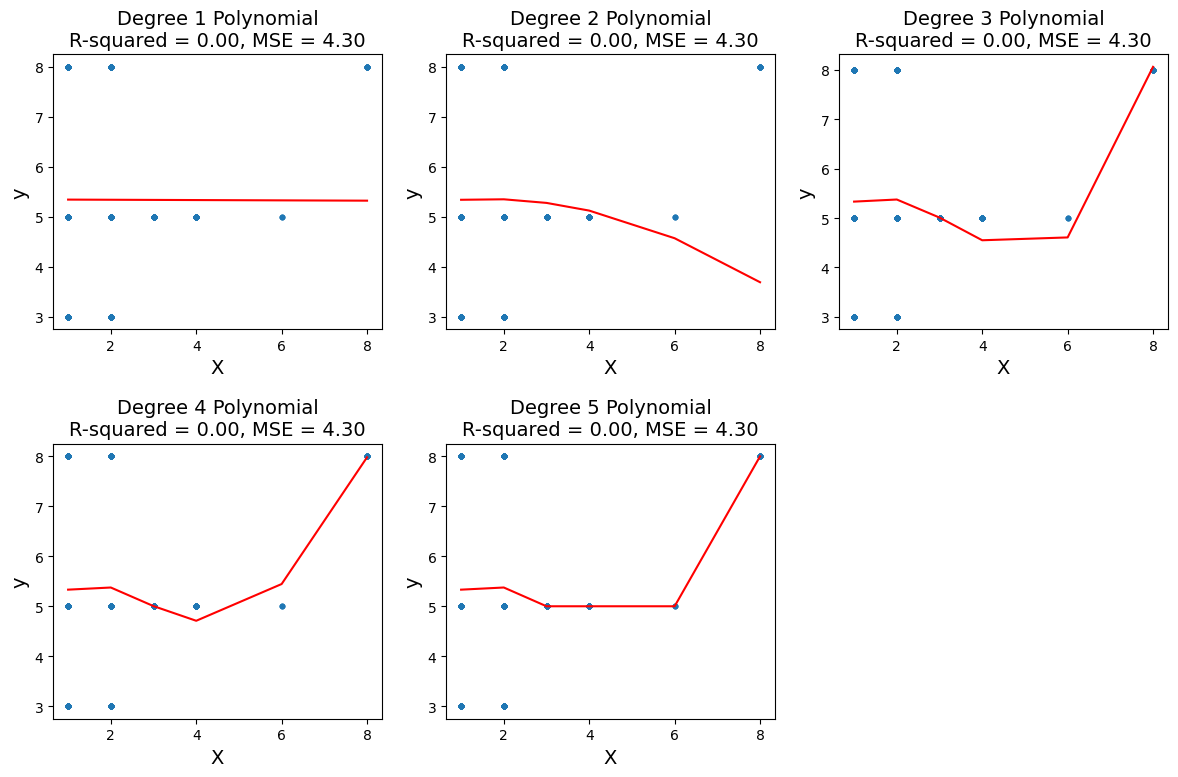

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

X = df['transaction_qty'].values.reshape(-1,1)
y = df['store_id'].values
# # X = X[:, np.newaxis]
# X=X.reshape(-1,1)

degrees = [1, 2, 3, 4, 5]

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    plt.subplot(2, 3, i + 1)
    plt.scatter(X, y, s=10)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Degree {degree} Polynomial\nR-squared = {r2:.2f}, MSE = {mse:.2f}')
    
    sort_axis = np.argsort(X.flatten())
    # print(sort_axis)

    plt.plot(X[sort_axis], y_pred[sort_axis], color='r')
    
plt.tight_layout()
plt.show()


## KMeans

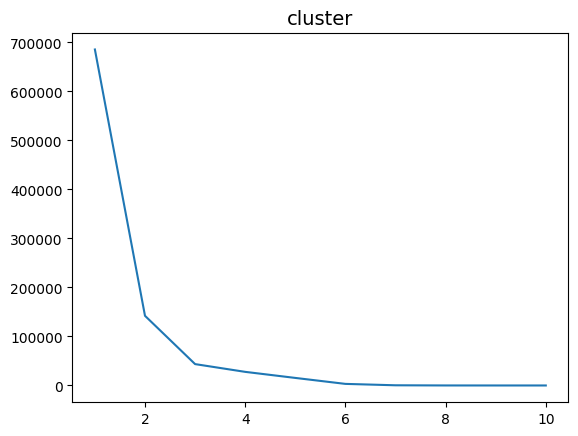

In [ ]:
from sklearn.cluster import KMeans

data = data[['transaction_qty','store_id']]
list1 = []


for i in range(1,11):
    kamen = KMeans(n_clusters=i)
    kamen.fit(data)
    list1.append(kamen.inertia_)
    
    
plt.plot(range(1,11),list1)
plt.title('cluster')
plt.show()
    


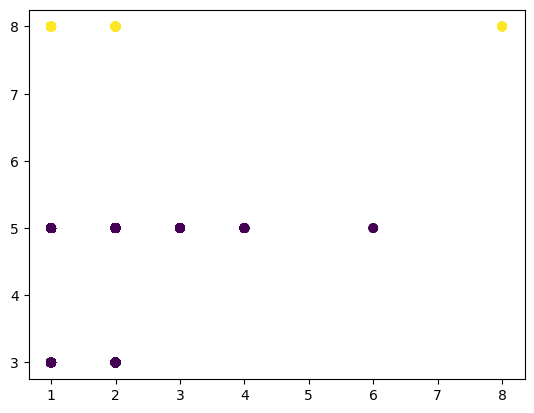

In [ ]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['transaction_qty','store_id' ]])

cluster_labels = kmeans.labels_


plt.scatter(df['transaction_qty'], df['store_id'], c=cluster_labels, cmap='viridis')
plt.show()

In [ ]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,1
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,1


# DFS

In [ ]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
data.iterrows()

<generator object DataFrame.iterrows at 0x00000266C2C6BCD0>

In [ ]:
data

,transaction_qty,store_id
0,2,5
1,2,5
2,2,5
3,1,5
4,2,5
...,...,...
149111,2,8
149112,2,8
149113,1,8
149114,1,8


In [ ]:
graph = defaultdict(set)
for _, row in data.iterrows():
    source = str(row['transaction_qty'])
    target = str(row['store_id'])
    graph[source].add(target)
    graph[target].add(source)  

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    
    print(start)
    
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

dfs(graph, '3')

3
2
5
4
1
8
6
8
5
1


{'1', '2', '3', '4', '5', '6', '8'}

## BFS

In [ ]:


graph = collections.defaultdict(list)
for _, row in data.iterrows():
    source = int(row['transaction_qty'])
    target = int(row['store_id'])
    graph[source].append(target)

def bfs(graph, root):
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    while queue:
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)


bfs(graph, 3)

3 5 

## ANN 

In [ ]:

X = data.drop('transaction_qty', axis=1).values
y = data['store_id'].values.reshape(-1, 1) 


encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
 
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        m = y.shape[0]
        
      
        delta2 = output - y
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m
        
        
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m
        
        
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 100 == 0:
                loss = -np.mean(y * np.log(output + 1e-8)) 
                print(f'Epoch {epoch}, Loss: {loss}')
    
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)
    
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

epochs = 11
nn.train(X_train, y_train, epochs)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Test accuracy: {accuracy}')


Epoch 0, Loss: 0.4234354704979799
Test accuracy: 0.33999463519313305


## PSO

Iteration 0/100, Best Value: 4.637503172241645
Iteration 10/100, Best Value: 4.3522781482912825
Iteration 20/100, Best Value: 4.303839184897501
Iteration 30/100, Best Value: 4.302518713507255
Iteration 40/100, Best Value: 4.302444933544495
Iteration 50/100, Best Value: 4.302442484685966
Iteration 60/100, Best Value: 4.302442472121859
Iteration 70/100, Best Value: 4.302442469185233
Iteration 80/100, Best Value: 4.302442469181476
Iteration 90/100, Best Value: 4.3024424691795025
Iteration 99/100, Best Value: 4.3024424691792325


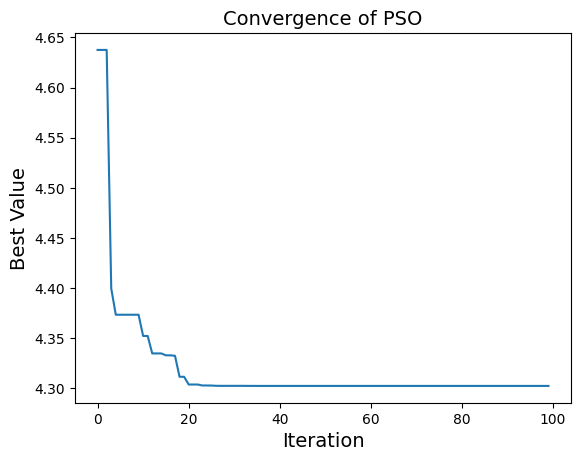

Best parameters found: a = -0.003034252587648829 b = 5.346425940868605


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = data['transaction_qty']
data_y = data['store_id']
def objective_function(params):
    a, b = params
    predictions = a * data_x + b
    mse = np.mean((data_y - predictions) ** 2)
    return mse

num_particles = 30
num_dimensions = 2
num_iterations = 100
inertia_weight = 0.5
cognitive_constant = 2.0
social_constant = 2.0
bounds = (-10, 10)


particles_position = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
particles_velocity = np.zeros((num_particles, num_dimensions))
personal_best_position = np.copy(particles_position)
personal_best_value = np.array([objective_function(p) for p in particles_position])
global_best_value = np.min(personal_best_value)
global_best_position = personal_best_position[np.argmin(personal_best_value)]


best_values = []

for iteration in range(num_iterations):
    for i in range(num_particles):

        inertia = inertia_weight * particles_velocity[i]
        cognitive = cognitive_constant * np.random.rand() * (personal_best_position[i] - particles_position[i])
        social = social_constant * np.random.rand() * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia + cognitive + social
        

        particles_position[i] += particles_velocity[i]
        

        particles_position[i] = np.clip(particles_position[i], bounds[0], bounds[1])
        

        current_value = objective_function(particles_position[i])
        if current_value < personal_best_value[i]:
            personal_best_position[i] = particles_position[i]
            personal_best_value[i] = current_value

        if current_value < global_best_value:
            global_best_position = particles_position[i]
            global_best_value = current_value
    

    best_values.append(global_best_value)
    

    if iteration % 10 == 0 or iteration == num_iterations - 1:
        print(f"Iteration {iteration}/{num_iterations}, Best Value: {global_best_value}")


plt.plot(best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.title("Convergence of PSO")
plt.show()


print("Best parameters found: a =", global_best_position[0], "b =", global_best_position[1])

## PolynomialFeatures

c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


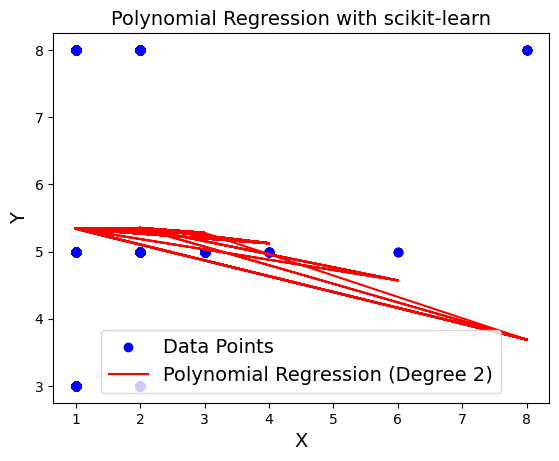

Coefficients: [ 0.          0.13231247 -0.04088457]
Intercept (b): 5.248368957244198


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data_x = data['transaction_qty'].values.reshape(-1, 1) 
data_y = data['store_id'].values

degree = 2
poly = PolynomialFeatures(degree)
data_x_poly = poly.fit_transform(data_x)


model = LinearRegression()

model.fit(data_x_poly, data_y)


predicted_y = model.predict(data_x_poly)


plt.scatter(data_x, data_y, color='blue', label='Data Points')
plt.plot(data_x, predicted_y, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with scikit-learn')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print("Intercept (b):", model.intercept_)

## Bdscan

Number of clusters: 187
Number of noise points: 13


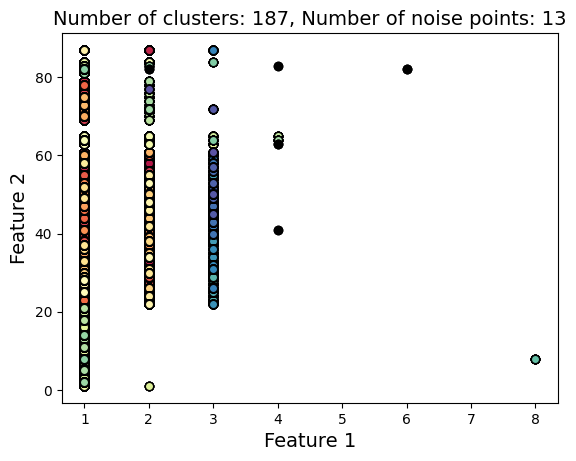

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



# Assuming the data has two features we want to cluster
X = data[['transaction_qty','product_id']].values   # Replace 'feature1' and 'feature2' with your actual column names

# Setting parameters for DBSCAN
eps = 0.5  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Running DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Plotting the results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Number of clusters: {n_clusters}, Number of noise points: {n_noise}')
plt.xlabel('Feature 1')  # Replace 'Feature 1' with the appropriate feature name
plt.ylabel('Feature 2')  # Replace 'Feature 2' with the appropriate feature name
plt.show()

Shape of data: (149116, 12)
Columns in data: Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'month'],
      dtype='object')
Shape of X: (149116, 2)
Shape of Y: (149116,)


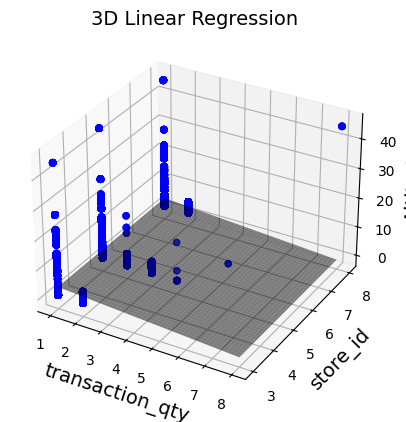

Coefficients (slopes): [-0.60546461  0.00229861]
Intercept (bias): 4.240765466169269


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression



print("Shape of data:", data.shape)
print("Columns in data:", data.columns)

X = data[['transaction_qty', 'store_id']].values
Y = data['unit_price'].values


print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

model = LinearRegression()


model.fit(X, Y)


Y_pred = model.predict(X)


x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
onlyX = np.array([x_surf.ravel(), y_surf.ravel()]).T


fittedY = model.predict(onlyX).reshape(x_surf.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[:, 0], X[:, 1], Y, color='blue', marker='o', alpha=0.5)

#
ax.plot_surface(x_surf, y_surf, fittedY, color='None', alpha=0.5)

ax.set_xlabel('transaction_qty')
ax.set_ylabel('store_id')
ax.set_zlabel('Altitude')

plt.title('3D Linear Regression')
plt.show()


print("Coefficients (slopes):", model.coef_)
print("Intercept (bias):", model.intercept_)

## NLTK

In [42]:
data

,transaction_id,transaction_qty,store_id,product_id,unit_price
0,1,2,5,32,3.00
1,2,2,5,57,3.10
2,3,2,5,59,4.50
3,4,1,5,22,2.00
4,5,2,5,57,3.10
...,...,...,...,...,...
149111,149452,2,8,44,2.50
149112,149453,2,8,49,3.00
149113,149454,1,8,45,3.00
149114,149455,1,8,40,3.75


In [40]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SunInternet.ir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SunInternet.ir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Example: Tokenizing and removing stopwords
stop_words = set(stopwords.words('english'))
processed_text = []

for text in data['product_type']:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    processed_text.append(filtered_words)

In [48]:
data['processed_text'] = processed_text
data.to_csv('processed_dataset.csv', index=False)